## Objetivo del proyecto:

Investigar el comportamiento del usuario para la aplicación de una empresa emergente que vende productos alimenticios.

* Primero: Estudiar el embudo de ventas. Descubrir cómo los usuarios y las usuarias llegan a la etapa de compra. ¿Cuántos usuarios o usuarias realmente llegan a esta etapa? ¿Cuántos se atascan en etapas anteriores? ¿Qué etapas en particular?

* Segundo: Observar los resultados de un test A/A/B. Al equipo de diseño le gustaría cambiar las fuentes de toda la aplicación, pero la gerencia teme que los usuarios y las usuarias piensen que el nuevo diseño es intimidante. Por ello, deciden tomar una decisión basada en los resultados de un test A/A/B.


## Importamos las librerías necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as stats

## Importamos nuestros archivos

In [2]:
eventos= pd.read_csv("logs_exp_us.csv", )

In [3]:
eventos.head(3)

,EventName\tDeviceIDHash\tEventTimestamp\tExpId
0,MainScreenAppear\t4575588528974610257\t1564029...
1,MainScreenAppear\t7416695313311560658\t1564053...
2,PaymentScreenSuccessful\t3518123091307005509\t...


In [4]:
eventos= pd.read_csv("/datasets/logs_exp_us.csv", sep="\t" )

In [5]:
eventos.head(3)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248


## Preparar los datos para el análisis

•	Comprueba si hay tipos de datos y valores ausentes. Corrige los datos si es necesario

In [6]:
eventos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


•	Cambia el nombre de las columnas de manera que sea conveniente para ti.

In [7]:
eventos.columns= ["nombre_evento","id_usuario","evento_timestamp", "grupo_de_control"]

•	Agrega una columna de fecha y hora y una columna separada para las fechas

In [8]:
eventos["fecha_hora_evento_dt"] = pd.to_datetime(eventos["evento_timestamp"], unit="s")

In [9]:
eventos.head(3)

,nombre_evento,id_usuario,evento_timestamp,grupo_de_control,fecha_hora_evento_dt
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47


Para agregar la columna de fecha usamos dt.date para convertir la columna con la fecha y la hora, así nos queda una columna separada solo con la fecha pero tipo string.

In [10]:
eventos["fecha_dt"] = eventos["fecha_hora_evento_dt"].dt.date

In [11]:
eventos.head(3)

,nombre_evento,id_usuario,evento_timestamp,grupo_de_control,fecha_hora_evento_dt,fecha_dt
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25


In [12]:
eventos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   nombre_evento         244126 non-null  object        
 1   id_usuario            244126 non-null  int64         
 2   evento_timestamp      244126 non-null  int64         
 3   grupo_de_control      244126 non-null  int64         
 4   fecha_hora_evento_dt  244126 non-null  datetime64[ns]
 5   fecha_dt              244126 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 11.2+ MB


Como tenemos la fecha en una columna aparte, pero tipo string entonces usamos pd.to_datetime para convertir esa misma columna a formato fecha. 

In [13]:
eventos["fecha_dt"] = pd.to_datetime(eventos["fecha_dt"], format="%Y-%m-%d")

In [14]:
eventos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   nombre_evento         244126 non-null  object        
 1   id_usuario            244126 non-null  int64         
 2   evento_timestamp      244126 non-null  int64         
 3   grupo_de_control      244126 non-null  int64         
 4   fecha_hora_evento_dt  244126 non-null  datetime64[ns]
 5   fecha_dt              244126 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 11.2+ MB


In [15]:
eventos.head(3)

,nombre_evento,id_usuario,evento_timestamp,grupo_de_control,fecha_hora_evento_dt,fecha_dt
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25


Verificamos si hay filas exactamente duplicadas y las eliminamos.

In [16]:
eventos.duplicated().sum()

413

In [17]:
eventos = eventos.drop_duplicates()

In [18]:
eventos.duplicated().sum()

0

In [19]:
eventos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   nombre_evento         243713 non-null  object        
 1   id_usuario            243713 non-null  int64         
 2   evento_timestamp      243713 non-null  int64         
 3   grupo_de_control      243713 non-null  int64         
 4   fecha_hora_evento_dt  243713 non-null  datetime64[ns]
 5   fecha_dt              243713 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 13.0+ MB


## Estudiar y comprobar los datos

•	¿Cuántos eventos hay en los registros?

In [20]:
eventos["nombre_evento"].nunique()

5

In [21]:
eventos["nombre_evento"].unique()

array(['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear',
       'OffersScreenAppear', 'Tutorial'], dtype=object)

In [22]:
eventos["nombre_evento"].value_counts()

MainScreenAppear           119101
OffersScreenAppear          46808
CartScreenAppear            42668
PaymentScreenSuccessful     34118
Tutorial                     1018
Name: nombre_evento, dtype: int64

Hay 5 eventos distintos en los datos.

•	¿Cuántos usuarios y usuarias hay en los registros?

In [23]:
eventos["id_usuario"].nunique()

7551

In [24]:
eventos["id_usuario"].value_counts()

6304868067479728361    2307
197027893265565660     1998
4623191541214045580    1768
6932517045703054087    1439
1754140665440434215    1221
                       ... 
395376432319166724        1
404128138074395619        1
6936517579657223951       1
5138854326043201424       1
3954096321632083010       1
Name: id_usuario, Length: 7551, dtype: int64

Hay 7551 usuarios unicos en los datos.

•	¿Cuál es el promedio de eventos por usuario?

In [25]:
eventos_usuario = eventos.groupby("id_usuario", as_index=False)["nombre_evento"].count()

In [26]:
eventos_usuario.head(3)

,id_usuario,nombre_evento
0,6888746892508752,1
1,6909561520679493,5
2,6922444491712477,47


In [27]:
eventos_usuario.describe()

,id_usuario,nombre_evento
count,7.551000e+03,7551.000000
mean,4.677319e+18,32.275593
std,2.655343e+18,65.154219
min,6.888747e+15,1.000000
25%,2.397700e+18,9.000000
50%,4.688022e+18,20.000000
75%,7.007353e+18,37.000000
max,9.222603e+18,2307.000000


In [28]:
eventos_usuario[eventos_usuario["nombre_evento"]==2307]

,id_usuario,nombre_evento
5116,6304868067479728361,2307


El promedio de eventos por usuario es de 32.

•	¿Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y mínima. 

In [29]:
eventos["fecha_dt"].describe()

count                  243713
unique                     14
top       2019-08-01 00:00:00
freq                    36141
first     2019-07-25 00:00:00
last      2019-08-07 00:00:00
Name: fecha_dt, dtype: object

Los datos cubren del 25 de julio de 2019 al 07 de agosto de 2019

Traza un histograma por fecha y hora. ¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo? Los eventos más antiguos podrían terminar en los registros de algunos usuarios o usuarias por razones técnicas y esto podría sesgar el panorama general. Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior. ¿Qué periodo representan realmente los datos?

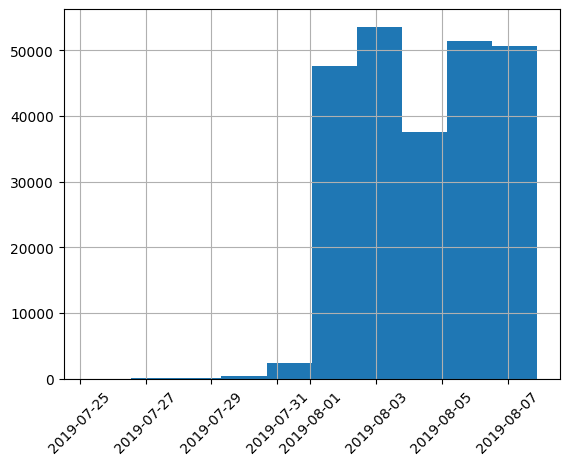

In [30]:
eventos["fecha_hora_evento_dt"].hist()
plt.xticks(rotation = 45)
plt.show()

Los 5 eventos que tenemos son:
* MainScreenAppear  - Aparece Pantalla Principal
* OffersScreenAppear - Aparecen Ofertas en la Pantalla   
* CartScreenAppear  - Aparecer el Carro en la Pantalla         
* PaymentScreenSuccessful - Pago en Pantalla Exitoso
* Tutorial  - Tutoría         

Analizando los 5 eventos, se intuye que el evento "MainScreenAppear  - Aparece Pantalla Principal" ,  es el primero que ocurre en una sesión normal de un usuario, por lo tanto si los datos estuvieran consistentes, en el histograma de este evento no deberian haber diferencias tan marcadas en la distribución de datos en los diferentes dias para este evento.

* Evento MainScreenAppear, Aparece Pantalla Principal

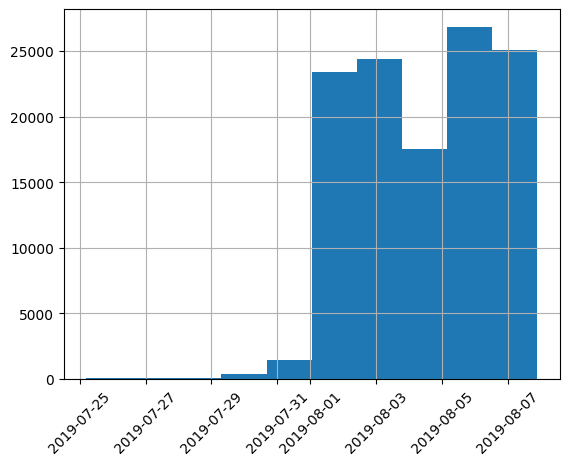

In [31]:
eventos[eventos["nombre_evento"]== "MainScreenAppear"]["fecha_hora_evento_dt"].hist()
plt.xticks(rotation=45)
plt.show()

Según los dos histogramas anteriores, se observa que desde el 01-08-2019 los datos se encuentran completos, pues de allí hacia atrás el volumen de informacón es bastante baja indicandonos que algo pudo suceder con esos días. Es por esto que vamos a crear un dataframe que contemple solo los datos desde el 01-08-2019 al 07-08-2019.

In [32]:
eventos_limpio = eventos[eventos["fecha_dt"]>="2019-08-01"]

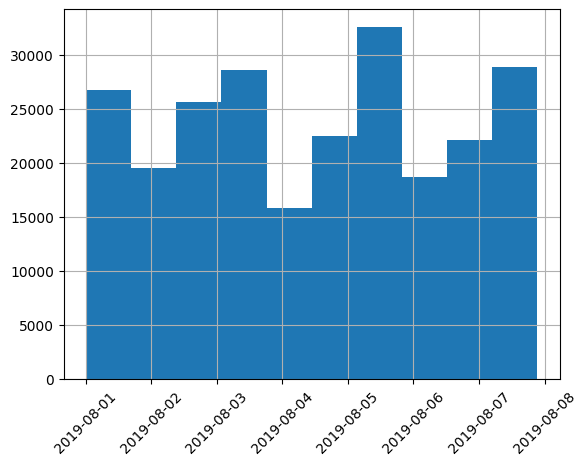

In [33]:
eventos_limpio["fecha_hora_evento_dt"].hist()
plt.xticks(rotation=45)
plt.show()

•	¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?

In [34]:
eventos_limpio["id_usuario"].value_counts()

6304868067479728361    2307
197027893265565660     1996
4623191541214045580    1768
6932517045703054087    1439
1754140665440434215    1221
                       ... 
5871870603459111234       1
1168091901476811199       1
2086627244641656064       1
7982248574455189469       1
404128138074395619        1
Name: id_usuario, Length: 7534, dtype: int64

In [35]:
eventos_limpio["nombre_evento"].value_counts()

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: nombre_evento, dtype: int64

In [36]:
eventos_limpio["nombre_evento"].nunique()

5

In [37]:
eventos_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240887 entries, 2828 to 244125
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   nombre_evento         240887 non-null  object        
 1   id_usuario            240887 non-null  int64         
 2   evento_timestamp      240887 non-null  int64         
 3   grupo_de_control      240887 non-null  int64         
 4   fecha_hora_evento_dt  240887 non-null  datetime64[ns]
 5   fecha_dt              240887 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 12.9+ MB


* Pasamos de 7551 usuarios unicos en los datos iniciales a 7534. Es decir que solo perdimos información de 17 id de usuarios. Eso es alrededor del 0.02% del total original de usuarios únicos.
* Con respecto a los eventos seguimos teniendo 5 eventos únicos.
* En cuanto al total de datos pasamos de 243.713 a 240.887, osea 2.826 datos se perdieron eso es un 1.16% apróximadamente de datos en comparación con los datos iniciales. Es decir que por cada 10 datos iniciales que se tenian, se perdió uno.

•	Asegúrate de tener usuarios y usuarias de los tres grupos experimentales.

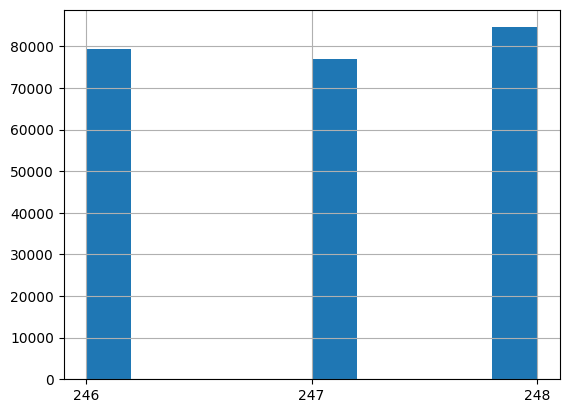

In [38]:
eventos_limpio["grupo_de_control"].hist()
plt.xticks(range(246,249,1))
plt.show()

In [39]:
eventos_limpio.groupby("grupo_de_control")["id_usuario"].count()

grupo_de_control
246    79302
247    77022
248    84563
Name: id_usuario, dtype: int64

* Comprobamos los grupos de control por usuarios únicos.

In [40]:
eventos_limpio.groupby("grupo_de_control")["id_usuario"].nunique()

grupo_de_control
246    2484
247    2513
248    2537
Name: id_usuario, dtype: int64

<AxesSubplot:xlabel='grupo_de_control'>

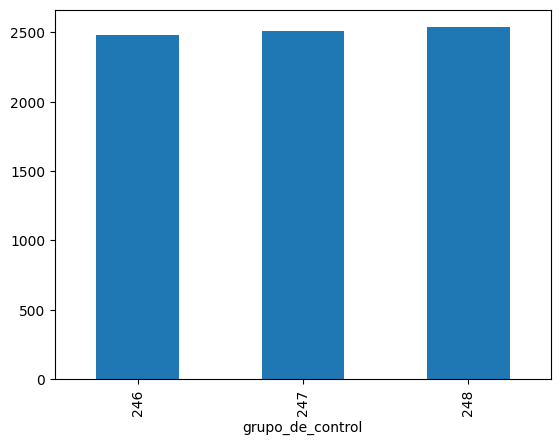

In [41]:
eventos_limpio.groupby("grupo_de_control")["id_usuario"].nunique().plot(kind="bar")

## Estudiar el embudo de eventos

•	Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.

In [42]:
eventos_limpio["nombre_evento"].value_counts()

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: nombre_evento, dtype: int64

<AxesSubplot:>

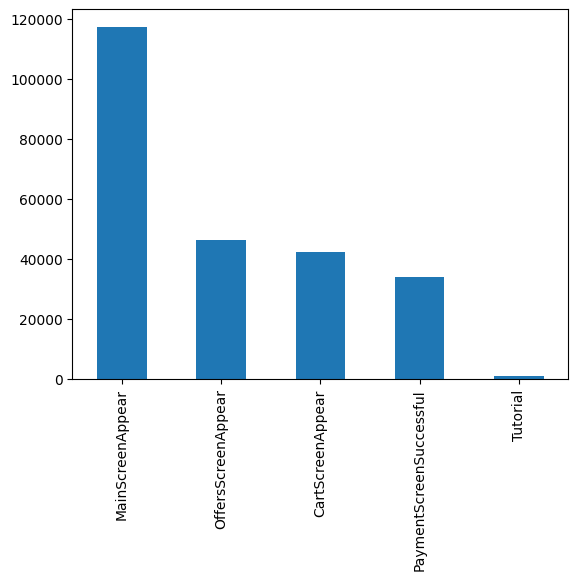

In [43]:
eventos_limpio["nombre_evento"].value_counts().plot(kind= "bar")

Encuentra la cantidad de usuarios y usuarias que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios y usuarias.

In [44]:
eventos_por_usuario = eventos_limpio.groupby("nombre_evento",as_index=False)["id_usuario"].nunique()

In [45]:
eventos_por_usuario.columns=["nombre_evento","numero_usuarios"]

In [46]:
eventos_por_usuario = eventos_por_usuario.sort_values(by="numero_usuarios", ascending=False)

Calcula la proporción de usuarios y usuarias que realizaron la acción al menos una vez.

In [47]:
eventos_por_usuario["proporcion_usuarios_totales"] = eventos_por_usuario["numero_usuarios"]/eventos_limpio["id_usuario"].nunique()

In [48]:
eventos_por_usuario

,nombre_evento,numero_usuarios,proporcion_usuarios_totales
1,MainScreenAppear,7419,0.984736
2,OffersScreenAppear,4593,0.609636
0,CartScreenAppear,3734,0.495620
3,PaymentScreenSuccessful,3539,0.469737
4,Tutorial,840,0.111495


•	¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.

De acuerdo con el análisis de los 5 eventos que tenemos se establece el siguiente orden para los mismos:
* MainScreenAppear  - Aparece Pantalla Principal
* OffersScreenAppear - Aparecen Ofertas en la Pantalla   
* CartScreenAppear  - Aparecer el Carro en la Pantalla         
* PaymentScreenSuccessful - Pago en Pantalla Exitoso

Pero se intuye que el evento "Tutorial", no hace parte de la misma secuencia.
* Tutorial  - Tutoría      

•	Utiliza el embudo de eventos para encontrar la proporción de usuarios y usuarias que pasan de una etapa a la siguiente. (Por ejemplo, para la secuencia de eventos A → B → C, calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad en la etapa B).

* Primero filtramos cada evento con el id de usuario.

In [49]:
pantalla_ppal = pd.DataFrame(eventos_limpio[eventos_limpio["nombre_evento"]=="MainScreenAppear"]["id_usuario"])
oferta = eventos_limpio[eventos_limpio["nombre_evento"]=="OffersScreenAppear"]["id_usuario"]
carrito_compras = eventos_limpio[eventos_limpio["nombre_evento"]=="CartScreenAppear"]["id_usuario"]
pago = eventos_limpio[eventos_limpio["nombre_evento"]=="PaymentScreenSuccessful"]["id_usuario"]

* Con los data frame de cada evento con sus numeros de usuario, vamos a filtrar los usuarios que pasan de un evento al otro.

In [50]:
evento1 = pantalla_ppal["id_usuario"].nunique()

In [51]:
evento1a2 = pantalla_ppal[pantalla_ppal["id_usuario"].isin(oferta)].nunique()

In [52]:
evento2a3 = pantalla_ppal[pantalla_ppal["id_usuario"].isin(carrito_compras)].nunique()

In [53]:
evento3a4 = pantalla_ppal[pantalla_ppal["id_usuario"].isin(pago)].nunique()

In [54]:
evento1

7419

In [55]:
evento1a2

id_usuario    4482
dtype: int64

In [56]:
evento2a3

id_usuario    3635
dtype: int64

In [57]:
evento3a4

id_usuario    3441
dtype: int64

* Calculamos el porcentaje de usuarios que pasan de una etapa a otra.

In [58]:
# Porcentaje de usuarios que pasan de la pantalla principal a la oferta:
round((evento1a2/evento1)*100,2)

id_usuario    60.41
dtype: float64

In [59]:
# Porcentaje de usuarios que pasan de la oferta al carrito de compras:
round((evento2a3/evento1a2)*100,2)

id_usuario    81.1
dtype: float64

In [60]:
# Porcentaje de usuarios que pasan del carrito de compras al pago:
round((evento3a4/evento2a3)*100,2)

id_usuario    94.66
dtype: float64

•	¿En qué etapa pierdes más usuarios y usuarias?

Se pierden mas usuarios en la etapa de la pantalla principal a la oferta, ya que 7419 usuarios que ven la pantalla principal, solo 4.482 pasan a la oferta, eso equivale al 60.41% .

•	¿Qué porcentaje de usuarios y usuarias hace todo el viaje desde su primer evento hasta el pago?

In [61]:
evento1

7419

In [62]:
evento3a4

id_usuario    3441
dtype: int64

In [63]:
pantalla_ppal_a_pago = evento3a4/evento1

In [64]:
round((pantalla_ppal_a_pago*100),2)

id_usuario    46.38
dtype: float64

Del total de 7.419 usuarios que ingresan a la pantalla principal 3.441 llegan a la etapa de pago , eso equivale al 46.38%

## Estudiar los resultados del experimento

•	¿Cuántos usuarios y usuarias hay en cada grupo?

In [65]:
eventos_limpio.groupby("grupo_de_control")["id_usuario"].nunique()

grupo_de_control
246    2484
247    2513
248    2537
Name: id_usuario, dtype: int64

•	Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.

•	número de experimento: 246 y 247 son los grupos de control, 248 es el grupo de prueba.

In [66]:
grupo246 = eventos_limpio[eventos_limpio["grupo_de_control"]==246]["id_usuario"].value_counts()
grupo247 = eventos_limpio[eventos_limpio["grupo_de_control"]==247]["id_usuario"].value_counts()

In [67]:
dif_estad_muestras = (stats.mannwhitneyu(grupo246,grupo247)[1])

In [68]:
if dif_estad_muestras >= 0.05:
    print("p_valor:", dif_estad_muestras, "Aceptamos la hipótesis nula, no hay una diferencia estadistícamente significativa entre las muestras 246 y 247"),
else:
    print("p_valor:", dif_estad_muestras, "No podemos aceptar la hipótesis nula, hay una diferencia estadistícamente significativa entre las muestras 246 y 247")

p_valor: 0.8721841921024993 Aceptamos la hipótesis nula, no hay una diferencia estadistícamente significativa entre las muestras 246 y 247


•	Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios y usuarias que realizaron esta acción. Encuentra su proporción. Comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite el procedimiento para todos los demás eventos (ahorrarás tiempo si creas una función especial para esta prueba). ¿Puedes confirmar que los grupos se dividieron correctamente?

In [69]:
eventos_246 = eventos_limpio[eventos_limpio["grupo_de_control"]==246]
eventos_247 = eventos_limpio[eventos_limpio["grupo_de_control"]==247]

In [70]:
eventos_246_agrupado = eventos_246.groupby("nombre_evento", as_index= False)["id_usuario"].nunique()

In [71]:
eventos_246_agrupado

,nombre_evento,id_usuario
0,CartScreenAppear,1266
1,MainScreenAppear,2450
2,OffersScreenAppear,1542
3,PaymentScreenSuccessful,1200
4,Tutorial,278


In [72]:
eventos_247_agrupado = eventos_247.groupby("nombre_evento", as_index= False)["id_usuario"].nunique()

In [73]:
eventos_247_agrupado

,nombre_evento,id_usuario
0,CartScreenAppear,1238
1,MainScreenAppear,2476
2,OffersScreenAppear,1520
3,PaymentScreenSuccessful,1158
4,Tutorial,283


In [74]:
eventos_246_MainScreenAppear = eventos_limpio[(eventos_limpio["grupo_de_control"]==246)&(eventos_limpio["nombre_evento"]=="MainScreenAppear")]["nombre_evento"].count()

El evento mas popular en ambos grupos de control es "MainScreenAppear" , "Aparece la pantalla principal"

### Evento "MainScreenAppear" , "Aparece la pantalla principal" en los grupos de control

Agrupamos por grupo_de_control y nombre de evento para encontrar el número de usuarios que ejecutaron dicho evento.

In [75]:
eventos_246_MainScreenAppear = pd.DataFrame(eventos_limpio[(eventos_limpio["grupo_de_control"]==246)&(eventos_limpio["nombre_evento"]=="MainScreenAppear")]["id_usuario"].value_counts()).reset_index()
eventos_246_MainScreenAppear.columns= ["id_usuario", "n_usuarios"]
eventos_247_MainScreenAppear = pd.DataFrame(eventos_limpio[(eventos_limpio["grupo_de_control"]==247)&(eventos_limpio["nombre_evento"]=="MainScreenAppear")]["id_usuario"].value_counts()).reset_index()
eventos_247_MainScreenAppear.columns= ["id_usuario", "n_usuarios"]

In [76]:
eventos_246_MainScreenAppear.head(2)

,id_usuario,n_usuarios
0,2614239180094538519,167
1,1232481244696430727,164


In [77]:
""" Declaramos las variables sample con los usuarios por grupo y evento. Los usuarios que no correspondan al grupo y evento analizado tendrán un 0. """

""" Ceros para los usuarios que no correspondan al grupo y evento. Su número es la diferencia entre el número total de usuarios de todo el grupo y el número de registros en cada grupo por usuario y evento:  """

""" Hemos utilizado la función np.arange() para crear una lista de índices. Funciona como la función range() pero crea una matriz de índices en el formato np.array requerido por pd.Series. """

' Hemos utilizado la función np.arange() para crear una lista de índices. Funciona como la función range() pero crea una matriz de índices en el formato np.array requerido por pd.Series. '

In [78]:
sample_246_MainScreenAppear = pd.concat([eventos_246_MainScreenAppear['n_usuarios'],pd.Series(0, index=np.arange(eventos_limpio[eventos_limpio["grupo_de_control"]==246]['id_usuario'].count() - len(eventos_246_MainScreenAppear['n_usuarios'])), name='eventos')], axis = 0)
sample_247_MainScreenAppear = pd.concat([eventos_247_MainScreenAppear['n_usuarios'],pd.Series(0, index=np.arange(eventos_limpio[eventos_limpio["grupo_de_control"]==247]['id_usuario'].count() - len(eventos_247_MainScreenAppear['n_usuarios'])), name='eventos')], axis = 0)

In [79]:
MainScreenAppear_grupos_control = (stats.mannwhitneyu(sample_246_MainScreenAppear,sample_247_MainScreenAppear)[1])

In [80]:
if MainScreenAppear_grupos_control >= 0.05:
    print("p_valor:", MainScreenAppear_grupos_control, "Aceptamos la hipótesis nula, no hay una diferencia estadistícamente significativa entre los grupos"),
else:
    print("p_valor:", MainScreenAppear_grupos_control, "No podemos aceptar la hipótesis nula, hay una diferencia estadistícamente significativa entre los grupos")

p_valor: 0.1542734912519323 Aceptamos la hipótesis nula, no hay una diferencia estadistícamente significativa entre los grupos


### Evento OffersScreenAppear, Aparecen Ofertas en la Pantalla en los grupos de control

In [81]:
""" Creamos la función para agrupar por grupo_de_control y nombre de evento para encontrar el número de usuarios que ejecutaron dicho evento y para declarar las variables sample con los usuarios por grupo y evento. Los usuarios que no correspondan al grupo y evento analizado tendrán un 0. """

""" Ceros para los usuarios que no correspondan al grupo y evento. Su número es la diferencia entre el número total de usuarios de todo el grupo y el número de registros en cada grupo por usuario y evento:  """

""" Hemos utilizado la función np.arange() para crear una lista de índices. Funciona como la función range() pero crea una matriz de índices en el formato np.array requerido por pd.Series. """

' Hemos utilizado la función np.arange() para crear una lista de índices. Funciona como la función range() pero crea una matriz de índices en el formato np.array requerido por pd.Series. '

In [82]:
def sample_evento_grupo(df, colum_grupo_control,colum_evento,colum_id_usuario, grupo_control1, grupo_control2, nombre_evento):
    filtro_evento1 = pd.DataFrame(df[(df[colum_grupo_control]==grupo_control1)&(df[colum_evento]==nombre_evento)][colum_id_usuario].value_counts()).reset_index()
    concatenar_evento1 = pd.concat([filtro_evento1['id_usuario'],pd.Series(0, index=np.arange(df[df[colum_grupo_control]==grupo_control1][colum_id_usuario].count() - len(filtro_evento1['id_usuario'])))], axis = 0)
 

    filtro_evento2 = pd.DataFrame(df[(df[colum_grupo_control]==grupo_control2)&(df[colum_evento]==nombre_evento)][colum_id_usuario].value_counts()).reset_index()
    concatenar_evento2 = pd.concat([filtro_evento2['id_usuario'],pd.Series(0, index=np.arange(df[df[colum_grupo_control]==grupo_control2][colum_id_usuario].count() - len(filtro_evento2['id_usuario'])))], axis = 0)
    
    Mannwhitneyu_grupos_control = (stats.mannwhitneyu(concatenar_evento1,concatenar_evento2)[1])
    
    if Mannwhitneyu_grupos_control >= 0.05:
        print("p_valor:", Mannwhitneyu_grupos_control, "Aceptamos la hipótesis nula, no hay una diferencia estadistícamente significativa entre los grupos"),
    else:
        print("p_valor:", Mannwhitneyu_grupos_control, "No podemos aceptar la hipótesis nula, hay una diferencia estadistícamente significativa entre los grupos")

In [83]:
sample_evento_grupo (eventos_limpio,"grupo_de_control","nombre_evento","id_usuario", 246, 247,"OffersScreenAppear")

p_valor: 0.6808277824585237 Aceptamos la hipótesis nula, no hay una diferencia estadistícamente significativa entre los grupos


### Evento CartScreenAppear  - Aparece el Carro en la Pantalla en los grupos de control

In [84]:
sample_evento_grupo (eventos_limpio,"grupo_de_control","nombre_evento","id_usuario", 246, 247,"CartScreenAppear")

p_valor: 0.8690917322772936 Aceptamos la hipótesis nula, no hay una diferencia estadistícamente significativa entre los grupos


### Evento PaymentScreenSuccessful - Pago en Pantalla Exitoso en los grupos de control

In [85]:
sample_evento_grupo (eventos_limpio,"grupo_de_control","nombre_evento","id_usuario", 246, 247,"PaymentScreenSuccessful")

p_valor: 0.86883840695884 Aceptamos la hipótesis nula, no hay una diferencia estadistícamente significativa entre los grupos


### Evento Tutorial  - Tutoría en los grupos de control

In [86]:
sample_evento_grupo (eventos_limpio,"grupo_de_control","nombre_evento","id_usuario", 246, 247,"Tutorial")

p_valor: 0.5766507488628729 Aceptamos la hipótesis nula, no hay una diferencia estadistícamente significativa entre los grupos


Después de comparar los 5 eventos en los dos grupos de control 246 y 247, se evidencia que no hay una diferencia estdística significativa entre los 2 grupos para ninguno de los eventos. Adicionalmente como tampoco hay una diferencia estadística entre las muestras podemos concluir que los los grupos 246 y 247 se dividieron correctamente.

* Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. 

### Evento "MainScreenAppear" , "Aparece la pantalla principal" en el grupo de control 246 y grupo de fuentes alteradas 248

In [87]:
sample_evento_grupo (eventos_limpio,"grupo_de_control","nombre_evento","id_usuario", 246, 248,"MainScreenAppear")

p_valor: 0.10055996604977109 Aceptamos la hipótesis nula, no hay una diferencia estadistícamente significativa entre los grupos


### Evento OffersScreenAppear, Aparecen Ofertas en la Pantalla en el grupo de control 246 y grupo de fuentes alteradas 248

In [88]:
sample_evento_grupo (eventos_limpio,"grupo_de_control","nombre_evento","id_usuario", 246, 248,"OffersScreenAppear")

p_valor: 0.04530730257629029 No podemos aceptar la hipótesis nula, hay una diferencia estadistícamente significativa entre los grupos


### Evento CartScreenAppear  - Aparece el Carro en la Pantalla en el grupo de control 246 y grupo de fuentes alteradas 248

In [89]:
sample_evento_grupo (eventos_limpio,"grupo_de_control","nombre_evento","id_usuario", 246, 248,"CartScreenAppear")

p_valor: 0.019867902741648288 No podemos aceptar la hipótesis nula, hay una diferencia estadistícamente significativa entre los grupos


### Evento PaymentScreenSuccessful - Pago en Pantalla Exitoso en el grupo de control 246 y grupo de fuentes alteradas 248

In [90]:
sample_evento_grupo (eventos_limpio,"grupo_de_control","nombre_evento","id_usuario", 246, 248,"PaymentScreenSuccessful")

p_valor: 0.04924356553929974 No podemos aceptar la hipótesis nula, hay una diferencia estadistícamente significativa entre los grupos


### Evento Tutorial  - Tutoría en el grupo de control 246 y grupo de fuentes alteradas 248

In [91]:
sample_evento_grupo (eventos_limpio,"grupo_de_control","nombre_evento","id_usuario", 246, 248,"Tutorial")

p_valor: 0.47427867797406054 Aceptamos la hipótesis nula, no hay una diferencia estadistícamente significativa entre los grupos


### Evento "MainScreenAppear" , "Aparece la pantalla principal" en el grupo de control 247 y grupo de fuentes alteradas 248

In [92]:
sample_evento_grupo (eventos_limpio,"grupo_de_control","nombre_evento","id_usuario", 247, 248,"MainScreenAppear")

p_valor: 0.0020861193409148133 No podemos aceptar la hipótesis nula, hay una diferencia estadistícamente significativa entre los grupos


### Evento OffersScreenAppear, Aparecen Ofertas en la Pantalla en el grupo de control 247 y grupo de fuentes alteradas 248

In [93]:
sample_evento_grupo (eventos_limpio,"grupo_de_control","nombre_evento","id_usuario", 247, 248,"OffersScreenAppear")

p_valor: 0.016150809227986965 No podemos aceptar la hipótesis nula, hay una diferencia estadistícamente significativa entre los grupos


### Evento CartScreenAppear  - Aparece el Carro en la Pantalla en el grupo de control 247 y grupo de fuentes alteradas 248

In [94]:
sample_evento_grupo (eventos_limpio,"grupo_de_control","nombre_evento","id_usuario", 247, 248,"CartScreenAppear")

p_valor: 0.013159500448092281 No podemos aceptar la hipótesis nula, hay una diferencia estadistícamente significativa entre los grupos


### Evento PaymentScreenSuccessful - Pago en Pantalla Exitoso en el grupo de control 247 y grupo de fuentes alteradas 248

In [95]:
sample_evento_grupo (eventos_limpio,"grupo_de_control","nombre_evento","id_usuario", 247, 248,"PaymentScreenSuccessful")

p_valor: 0.07435502272728042 Aceptamos la hipótesis nula, no hay una diferencia estadistícamente significativa entre los grupos


### Evento Tutorial  - Tutoría en el grupo de control 247 y grupo de fuentes alteradas 248

In [96]:
sample_evento_grupo (eventos_limpio,"grupo_de_control","nombre_evento","id_usuario", 247, 248,"Tutorial")

p_valor: 0.20128156004943998 Aceptamos la hipótesis nula, no hay una diferencia estadistícamente significativa entre los grupos


* Compara los resultados con los resultados combinados de los grupos de control. 

In [97]:
# Para este punto hacemos un pequeño ajuste en la función creada anteriormente para comparar los grupos control combinados 
# y la renombramos como sample_evento_grupo2:

In [98]:
def sample_evento_grupo2(df, colum_grupo_control,colum_evento,colum_id_usuario, grupo_control1, grupo_control2, nombre_evento):
    filtro_evento1 = pd.DataFrame(df[(df[colum_grupo_control]!=grupo_control1)&(df[colum_evento]==nombre_evento)][colum_id_usuario].value_counts()).reset_index()
    concatenar_evento1 = pd.concat([filtro_evento1['id_usuario'],pd.Series(0, index=np.arange(df[df[colum_grupo_control]!=grupo_control1][colum_id_usuario].count() - len(filtro_evento1['id_usuario'])))], axis = 0)
 

    filtro_evento2 = pd.DataFrame(df[(df[colum_grupo_control]==grupo_control2)&(df[colum_evento]==nombre_evento)][colum_id_usuario].value_counts()).reset_index()
    concatenar_evento2 = pd.concat([filtro_evento2['id_usuario'],pd.Series(0, index=np.arange(df[df[colum_grupo_control]==grupo_control2][colum_id_usuario].count() - len(filtro_evento2['id_usuario'])))], axis = 0)
    
    Mannwhitneyu_grupos_control = (stats.mannwhitneyu(concatenar_evento1,concatenar_evento2)[1])
    
    if Mannwhitneyu_grupos_control >= 0.05:
        print("p_valor:", Mannwhitneyu_grupos_control, "Aceptamos la hipótesis nula, no hay una diferencia estadistícamente significativa entre los grupos"),
    else:
        print("p_valor:", Mannwhitneyu_grupos_control, "No podemos aceptar la hipótesis nula, hay una diferencia estadistícamente significativa entre los grupos")

### Evento "MainScreenAppear" , "Aparece la pantalla principal" en los grupos combinados y grupo de fuentes alteradas 248

In [99]:
sample_evento_grupo2 (eventos_limpio,"grupo_de_control","nombre_evento","id_usuario", 248, 248,"MainScreenAppear")

p_valor: 0.006468454232482094 No podemos aceptar la hipótesis nula, hay una diferencia estadistícamente significativa entre los grupos


### Evento OffersScreenAppear, Aparecen Ofertas en la Pantalla en los grupos combinados y grupo de fuentes alteradas 248

In [100]:
sample_evento_grupo2 (eventos_limpio,"grupo_de_control","nombre_evento","id_usuario", 248, 248,"OffersScreenAppear")

p_valor: 0.010999884303322141 No podemos aceptar la hipótesis nula, hay una diferencia estadistícamente significativa entre los grupos


### Evento CartScreenAppear  - Aparece el Carro en la Pantalla en los grupos combinados y grupo de fuentes alteradas 248

In [101]:
sample_evento_grupo2 (eventos_limpio,"grupo_de_control","nombre_evento","id_usuario", 248, 248,"CartScreenAppear")

p_valor: 0.005581606642317433 No podemos aceptar la hipótesis nula, hay una diferencia estadistícamente significativa entre los grupos


### Evento PaymentScreenSuccessful - Pago en Pantalla Exitoso en los grupos combinados y grupo de fuentes alteradas 248

In [102]:
sample_evento_grupo2 (eventos_limpio,"grupo_de_control","nombre_evento","id_usuario", 248, 248,"PaymentScreenSuccessful")

p_valor: 0.030210439202007364 No podemos aceptar la hipótesis nula, hay una diferencia estadistícamente significativa entre los grupos


### Evento Tutorial  - Tutoría los grupos combinados y grupo de fuentes alteradas 248

In [103]:
sample_evento_grupo2 (eventos_limpio,"grupo_de_control","nombre_evento","id_usuario", 248, 248,"Tutorial")

p_valor: 0.2506671362717705 Aceptamos la hipótesis nula, no hay una diferencia estadistícamente significativa entre los grupos


#### Conclusiones:

* Comparando los grupos 246 y 248 se evidencia que en todos los eventos que pertenecen a la misma secuencia de la compra a excepción de la acción cuando aparece la pantalla principal hay una diferencia significativa entre los grupos, esto puede mostrarnos que si está siendo efectivo el cambio de fuentes en toda la aplicación. Y puede que no haya nuevos ingresos a la pantalla principal, pero si nuevas ejecuciones de compras hasta llegar al pago.
* Con respecto a los grupos 247 vs 248 se evidencia una diferencia significativa en todos los eventos que pertenecen a la misma secuencia de la compra a excepción de la acción del pago en pantalla exitoso, esto nos puede mostrar que se están llegando a nuevos clientes, pero se debe fortalecer la etapa de concretarlos para que lleguen al pago y se hagan más ventas efectivas.
* Por último, en cuanto a los grupos combinados 246 y 247 vs el 248 se evidencia una diferencia significativa en todos los eventos que pertenecen a la misma secuencia de la compra, esto nos indica que a nivel general el cambio de fuentes en toda la aplicación ha funcionado en toda la secuencia de compra desde la visualización de la página hasta el pago.
* En cuanto al evento tutoría en todos los experimentos no hubo diferencia significativa, es decir que los cambios en los grupos no afectaron este evento.


* ¿Qué nivel de significación has establecido para probar las hipótesis estadísticas mencionadas anteriormente? Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significación? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones.

Para las pruebas de hipótesis se estableció un nivel de significancia del 5% es decir que cada 10 resultados 0.5 podría ser falso, y de acuerdo con mi criterí profesional es un buen margen y se deja en ese nivel.